# Algoritmos de descenso del gradiente como una aproximación a la regresión lineal

## 1. Introducción

<div style="text-align: justify">
Por lo general, los investigadores tratan de explicar fenomenos, de distintas naturalezas y en todas las ramas del conocimiento, a partir de la relación que puede existir entre las variables de estudio. Una de las herramientas para caracterizar dichas relaciones es la Regresión Lineal la cual, como indica su nombre, permite predecir el comportamiento de una variable dependiente (denotada usualmente como Y) a partir de la relación lineal de esta con unas variables independientes (denotadas usualmente como X). Particularmente la Regresión Lineal Simple permite comprender el funcionamiento de esta herramienta de manera visual (Wooldridge, 2017), pues al existir solo una variable independiente para explicar la variable dependiente, se puede gráficar fácilmente en un plano bidimensional .<p></p><p></p>
    Este ensayo inicia con una breve historia sobre la apariciónla Regresión Lineal; posteriormente se presenta el algoritmo de descenso del gradiente como una aproximación al problema de Regresión Lineal, así como una aplicación de este para entender la relación entre el rendimiento académico en la secundaria sobre el rendimiento académico en la universidad; finalmente, se presentan las conclusiones del trabajo.
</div>

## 2. Historia

<div style="text-align: justify">
    La primera persona en acuñar el término regresión dentro de un contexto estadístico (pues ya era utilizado en otras disciplinas como la psicología y la filosofía) fue Francis Galton en 1889. En el artículo que publicó, trató de demostrar que las características de un individuo son heredadas a sus descendencia, pero siempre en un menor grado. Por ejemplo, que los individuos con padres altos también son altos, pero en menor medida que sus antecesores. Posteriormente, su discípulo Karl Pearson comprobó que de manera opuesta los individuos con padres de menor estatura solían ser más altos que sus padres, concluyendo en conjunto que la altura tendía a 'regresar hacia la mediocridad', es decir, se seguían aproximando a la media poblacional. Así se visualizó el uso de la Regresión Lineal por primera vez:   
</div>

<center><img src='Imagenes/Galton89.png'></center>

<div style="text-align: justify">
    En esta gráfica, la línea punteada representa la linea de igualdad entre la media de la altura de los padres y los hijos, mientras que la linea continua es la regresión realizada por Galton, que muestra justamente la comprobación de su hipótesis. Sin embargo, para estimar la linea continúa, el método de optimización de mínimos cuadrados fue desarrollado mucho antes por Legrande en 1805 y Gauss en 1809. [Mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados#Historia)
</div>

## 3. Algoritmo de descenso del gradiente

<div style="text-align: justify">El algoritmo de descenso del gradiente permite la convergencia hacia un óptimo local por medio de un proceso de ajuste iterativo. La función que se quiere optimizar es el Error Cuadrático Medio, o en otras palabras, la distancia entre los valores reales y los predecidos por medio de la regresión.</div>

$$E = \frac{1}{n}\sum^n_{i=0}(y_i-\hat{y}_i)$$<p></p>
$$E = \frac{1}{n}\sum^n_{i=0}(y_i-mx_i+c)$$<p></p>

<div style="text-align: justify">Como se puede observar, dentro de la función existen dos parámetros para minimizarla, estos son c y m, que serían el intercepto y la pendiente, respectivamente. Para optimizar la función se deven hallar las derivadas parciales respecto a cada uno de ellos.</div>

$$D_m = \frac{-2}{n}\sum^n_{i=0}x_i(y_i-(mx_i+c))$$<p></p>
$$D_c = \frac{-2}{n}\sum^n_{i=0}-2(y_i-(mx_i+c))$$<p></p>

<div style="text-align: justify">Posteriormente, se ajustan los valores iniciales de c y m en función al valor del gradiente (las derivadas parciales) y la tasa de aprendizaje.
$$m=m-L\times D_m$$
$$c=c-L\times D_c$$
El proceso se repite hasta minimizar la función de pérdida de acuerdo a un parámetro establecido, idealmente 0, resultado los ultimos valores de c y m los que óptimos. Si el proceso no converge a un óptimo, el investigador puede establecer un número máximo de repeticiones para acabar el proceso.</div>

## 4. Ejemplo: GPA Universidad vs GPA Secundaria

<div style="text-align: justify">Los datos para la aplicación son tomados del set de datos de Wooldridge, la base de datos gpa1 contiene información de 141 estudiantes de la Michigan State University (MSU), la encuesta incluyó información sobre variables socio-económicas de los estudiantes así como sus promedios académicos en la universidad y en la universidad. Christopher Lemmon recolectó estos datos en otoño de 1994. La intención de este ejercicio es evaluar si existe una relación entre el rendimiento académico de los estudiantes en la secundaria y su desempeño en la universidad, es decir, se quiere saber si ser aplicado en el colegio tiene un impacto en el ambito académico universitario.</div>

In [6]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#Cargar los datos del GPA del colegio y del GPA de la universidad (Wooldridge)
data = pd.read_excel("gpa.xlsx")
data.shape

(141, 29)

In [7]:
# Estadísticas descriptivas
data.describe()

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000
mean,20.886525,0.021277,0.382979,0.503546,0.092199,0.524823,0.170213,0.794326,0.035461,3.056738,...,0.319149,0.773050,0.936170,0.475177,0.602837,1.076241,1.901064,0.87234,0.588652,0.539007
std,1.271064,0.144819,0.487846,0.501770,0.290337,0.501164,0.377159,0.405634,0.185601,0.372310,...,0.467809,0.420353,0.245321,0.501164,0.491055,1.088882,1.374701,0.33490,0.493832,0.500253
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000
50%,21.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000
75%,21.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000
max,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.00000,1.000000,1.000000


In [8]:
### Extracción de las variable para la regresión 
Y = data['colGPA']
X = data['hsGPA']
# Valores iniciales de los parámetros
m = 0
c = 0

L = 0.0001  # Tasa de aprendizaje
epochs = 10000  # Número de iteraciones
criteria = 1e-5 # Criterio para detener las iteraciones
n = float(len(X)) # Number de observaciones

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # Valor predicho actual
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Gradiente de la pendiente
    D_c = (-2/n) * sum(Y - Y_pred)  # Gradiente de la constante
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    if max(abs(L * D_m), abs(L * D_c)) < criteria:
        break
# Impresión de los resultados
print("Los valores que se obtienen son:", m,c, "en",i, "iteraciones")
Y_opt=Y_pred

Los valores que se obtienen son: 0.8197054401377619 0.24326555980548314 en 2085 iteraciones


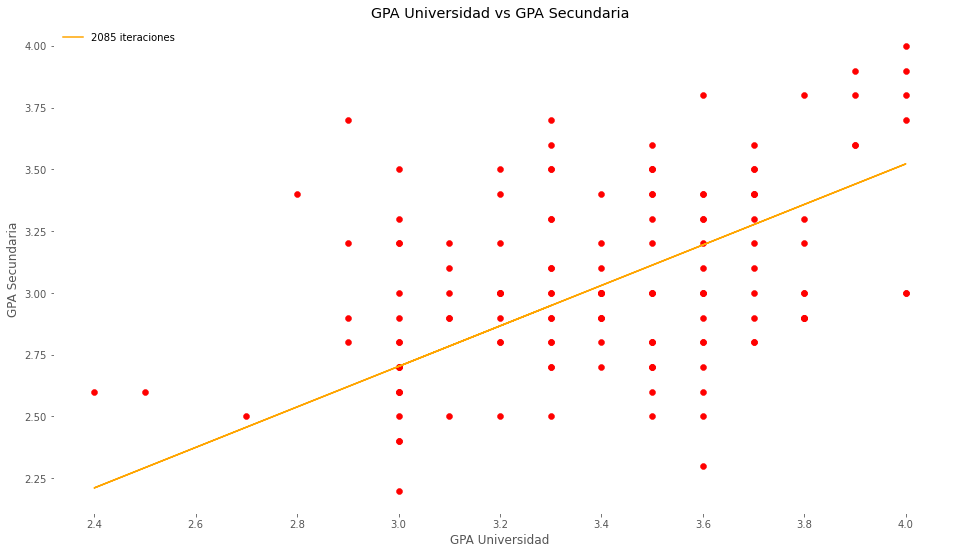

In [9]:
plt.scatter(X, Y, color = "red")
plt.plot(X, Y_opt, color = "orange")
plt.legend(('2085 iteraciones',),loc='upper left',facecolor='white', framealpha=0)
plt.title("GPA Universidad vs GPA Secundaria")
plt.xlabel("GPA Universidad")
plt.ylabel("GPA Secundaria")
ax = plt.gca()
ax.set_facecolor('white')
plt.show()

<div style="text-align: justify">En este caso, el proceso de ajuste de los gradientes convergió a un óptimo global después de 2.085 iteraciones, siendo la pendiente 0.819 y la constante 0.2432. Esto indica que en promedio y manteniendo todo lo demás constante, por cada décima adicional que se tuviera en el promedio académico de la secundaria se espera 0.819 décimas en el promedio académico de la universidad.</div>

## 5. Conclusiones

<div style="text-align: justify">
    La Regresión Lineal permite obtener la magnitud de la relación lineal que asocia a dos o más variables. Adicionalmente, se presentó la implementación del algoritmo de descenso del gradiente el cuál permite aproximar los resultados que se podrían obtener directamente de la derivación de los estimadores por medio de mínimos cuadrados ordinarios (MCO). Además, hay que señalar que los resultados de la aplicación del descenso del gradiente converge en cierta medida a los resultados obtenidos por MCO cuando hay suficientes iteraciones, el criterio para detener las iteraciones es lo suficientemente pequeño, parametros que son totalmente arbitrarios, pues los escoge quién programa el algoritmo. 
    </div>

## Referencias

[Regresión Lineal en Python y R. Machine Learning #01](https://dtellogaete.medium.com/regresión-lineal-en-python-y-r-machine-learning-01-ff9d9077f8f)<p></p>
[Implementación del método descenso del gradiente en Python](https://www.analyticslane.com/2018/12/21/implementacion-del-metodo-descenso-del-gradiente-en-python/)<p></p>
[Regresión Lineal en español con Python](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)<p></p>
[Linear Regression using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)<p></p>
[Wooldridge Data Sets](http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html)<p></p>
[Going back to the origin of regression](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788627306/1/ch01lvl1sec10/going-back-to-the-origin-of-regression)<p></p>
Wooldridge, J. (2017). Introductory econometrics : a modern approach. (7th Ed.). Mason, Ohio : South-Western Cengage Learning.